**Context:**
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

**Content:**
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/train.csv",  na_values=['#NAME?', '?'])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

satisfaction Distribution
neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64


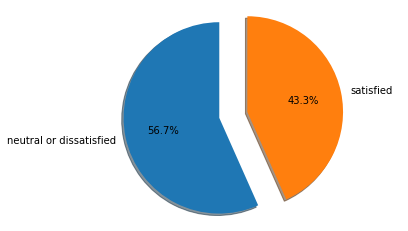

In [ ]:
import matplotlib.pyplot as plt

print("satisfaction Distribution")
data = df['satisfaction'].value_counts()
labels = data.index
print(data)
sizes = data.values / df.shape[0] * 100
explode = (0.15, 0.15)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

نلاحظ أنه يوجد انحياز قليل في البيانات وذلك لأنه يوجد فرق في عدد البيانات التي تنتمي لكل صنف وبما أن عدد البيانات كبير يمكن حل المشكلة السابقة من خلال التخلص من مجموعة من البيانات التي تسبب الانحياز وجعل الفرق بين عدد البيانات التي تنتمي لكل صنف صغير 

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)
dissatisfied = shuffle(df[df['satisfaction'] == "neutral or dissatisfied"])[:45000]
satisfied = shuffle(df[df['satisfaction'] == "satisfied"])

df = pd.concat([dissatisfied,satisfied])
df = shuffle(df)


satisfaction Distribution


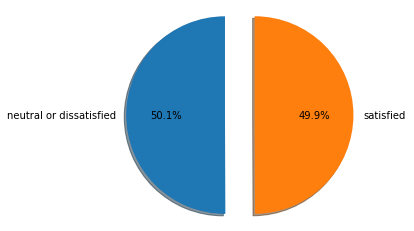

In [ ]:
print("satisfaction Distribution")
data = df['satisfaction'].value_counts()
labels = data.index
sizes = data.values / df.shape[0] * 100
explode = (0.15, 0.15)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
35317,35317,76353,Male,Loyal Customer,59,Business travel,Eco,1851,1,5,5,5,1,1,1,1,1,3,1,3,3,1,0,5.0,neutral or dissatisfied
93068,93068,43688,Female,Loyal Customer,36,Business travel,Business,257,2,2,2,2,2,1,4,4,4,4,4,5,4,4,0,1.0,satisfied
18245,18245,37313,Female,disloyal Customer,32,Business travel,Eco,972,2,2,2,4,1,2,1,1,4,5,4,1,3,1,0,0.0,neutral or dissatisfied
102761,102761,78669,Female,disloyal Customer,40,Business travel,Business,674,3,4,4,5,4,4,4,4,3,2,4,5,5,4,0,0.0,neutral or dissatisfied
12878,12878,51246,Female,Loyal Customer,36,Business travel,Eco Plus,308,2,2,2,2,2,2,2,2,2,1,4,5,3,2,0,0.0,satisfied


In [ ]:
features = df.loc[:,'Gender':'Arrival Delay in Minutes']
target = df.loc[:,'satisfaction']
X = features.values
y = target.values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

print("the first sample:")
print(X[0,:], " ", y[0])

X.shape: (89897, 22)  y.shape: (89897,)
the first sample:
['Male' 'Loyal Customer' 59 'Business travel' 'Eco' 1851 1 5 5 5 1 1 1 1 1
 3 1 3 3 1 0 5.0]   neutral or dissatisfied


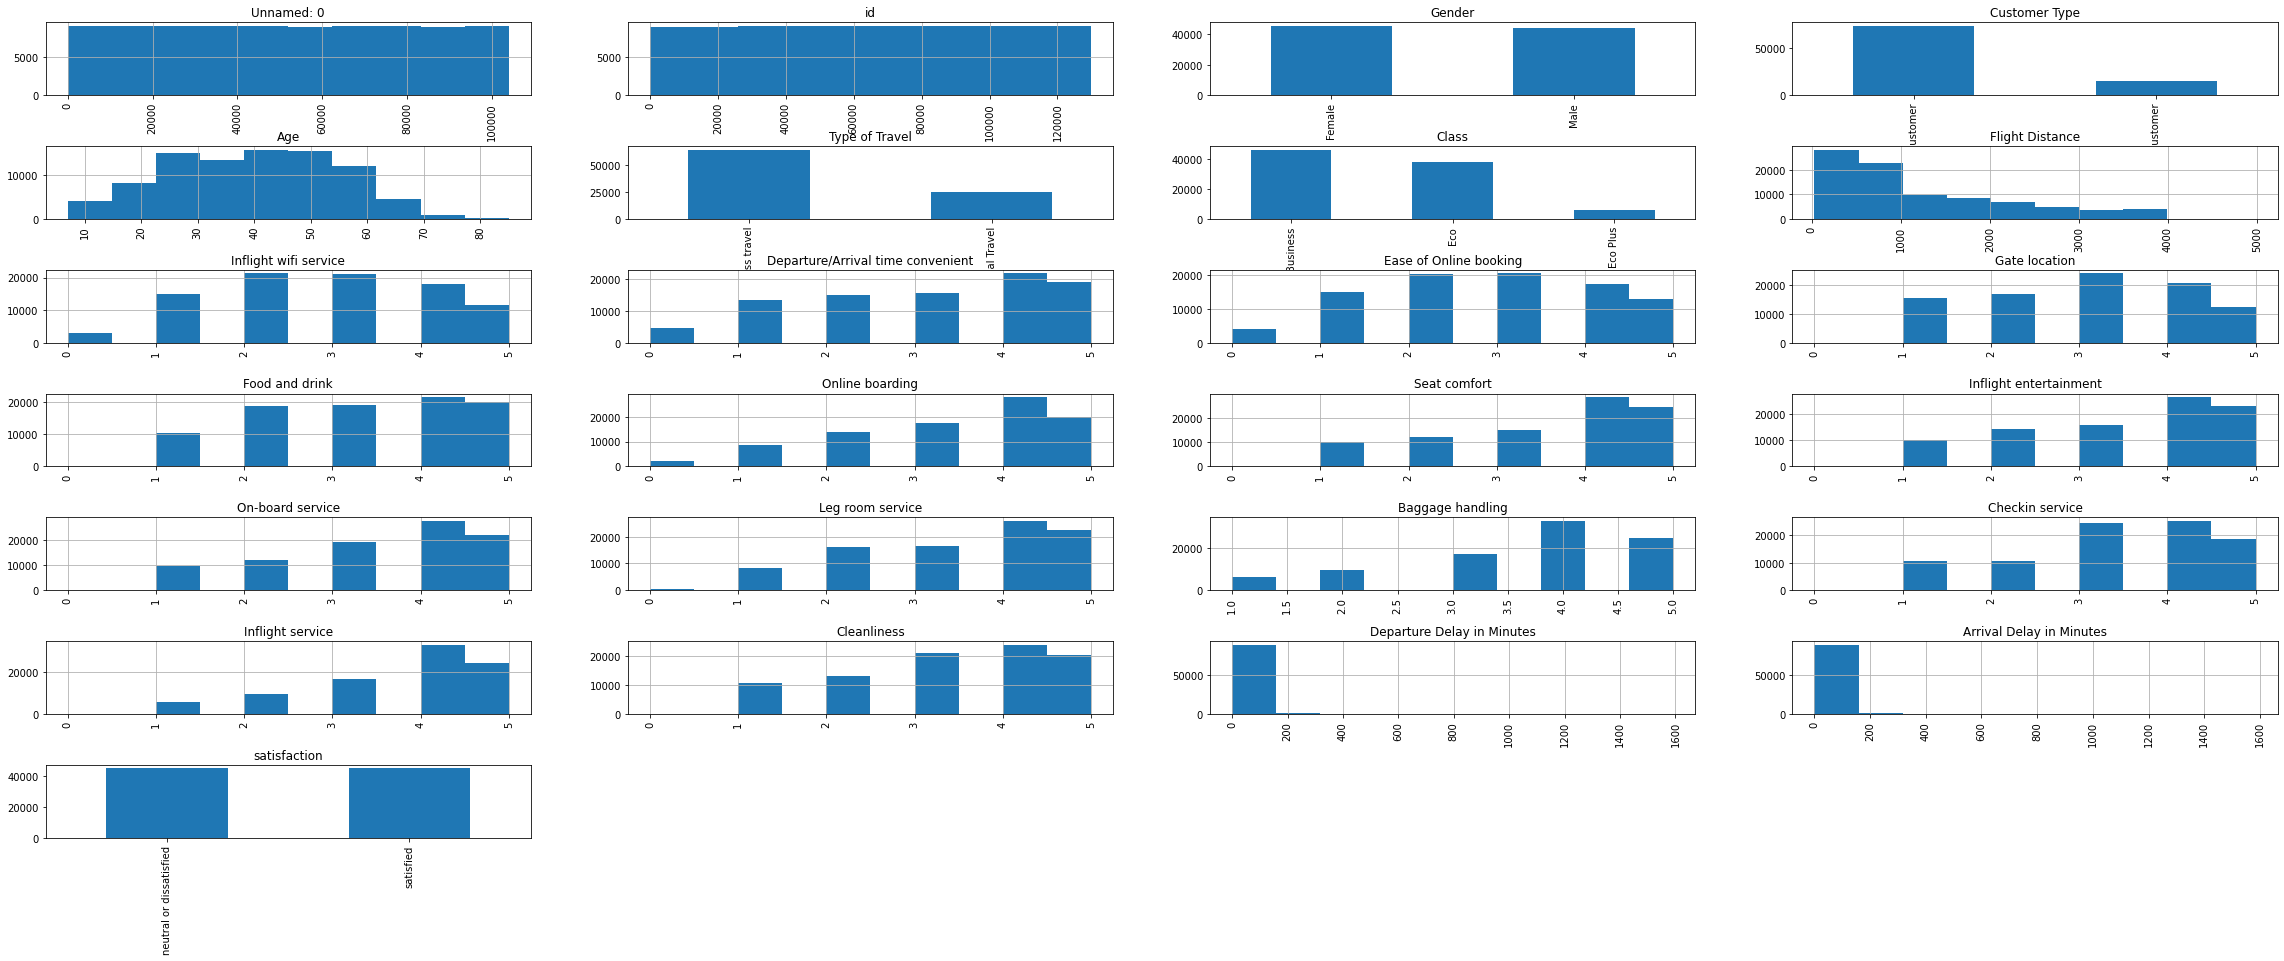

In [ ]:
import math
import numpy as np


fig = plt.figure(figsize=(40,15))
cols = 4
rows = math.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

لا يمكن العمل على البيانات الى قسم تدريب وفسم اختبار لأن هنالك جزء من البيانات ليست أرقاما ويمكن حل هذه المشكلة كما يلي

In [ ]:
#satisfaction = {'neutral or dissatisfied': 1,'satisfied': 2}
#df.satisfaction = [satisfaction[item] for item in df.satisfaction]
#satisfaction_neutral_or_dissatisfied = {'neutral or dissatisfied': 1,'satisfied': 0}

In [ ]:
print("Original features:\n", list(df.columns), "\n")
data_dummies = pd.get_dummies(df)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'] 

Features after get_dummies:
 ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer', 'Customer

In [ ]:
data_dummies.head(n=2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
82866,82866,94782,15,189,1,5,5,5,1,1,2,1,1,1,4,4,4,1,0,0.0,1,0,1,0,1,0,0,1,0,1,0
70907,70907,98422,54,2176,3,3,3,3,3,5,4,4,4,4,4,4,4,3,13,4.0,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
data_dummies = data_dummies.drop('Unnamed: 0',axis=1)
data_dummies = data_dummies.drop('id',axis=1)
features = data_dummies.loc[:,'Age':'Class_Eco Plus']
print(features)
target = data_dummies.loc[:,'satisfaction_neutral or dissatisfied']
# extract NumPy arrays
X = features.values
y = target.values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

       Age  Flight Distance  ...  Class_Eco  Class_Eco Plus
82866   15              189  ...          1               0
70907   54             2176  ...          0               0
41720   24             2133  ...          1               0
83473   42              521  ...          0               0
82582   69             1188  ...          1               0
...    ...              ...  ...        ...             ...
86996   25              255  ...          0               0
86721   43              495  ...          1               0
46493   40              700  ...          1               0
78219   79             1643  ...          0               0
48316   36              397  ...          1               0

[89897 rows x 27 columns]
X.shape: (89897, 27)  y.shape: (89897,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler,  Normalizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def model_section():
  sc = []
  for model in GaussianNB(), DecisionTreeClassifier(), SVC(kernel="poly", degree=3, coef0=1, C=5):
    model.fit(X_train, y_train)
    sc.append(model.score(X_train, y_train))
    sc.append(model.score(X_test, y_test))

    for scaler in StandardScaler(),RobustScaler(), MinMaxScaler(),  Normalizer():
      X_train_scaler = scaler.fit_transform(X_train)
      X_test_scaler = scaler.transform(X_test)

      model = GaussianNB()
      model.fit(X_train_scaler, y_train)
      #print("Scaler: " + str(scaler))
      #print('Accuracy on the training subset: {:.3f}'.format(model.score(X_train_scaler, y_train)))
      #print('Accuracy on the test subset: {:.3f}'.format(model.score(X_test_scaler, y_test)))
      sc.append(model.score(X_train_scaler, y_train))
      sc.append(model.score(X_test_scaler, y_test))
  return sc


In [ ]:
def print_model_section(sc):
  print("                              GaussianNB           Decision Trees           SVM")
  print("No Scaler:         Train:       %.3f                 %.3f              %.3f" %(sc[0], sc[10], sc[20]))
  print("                   Test:        %.3f                 %.3f              %.3f" %(sc[1], sc[11], sc[21]))
  print("------------------------------------------------------------------")
  print("StandardScaler:    Train:       %.3f                 %.3f              %.3f" %(sc[2], sc[12], sc[22]))
  print("                   Test:        %.3f                 %.3f              %.3f" %(sc[3], sc[13], sc[23]))
  print("------------------------------------------------------------------")
  print("RobustScaler:      Train:       %.3f                 %.3f              %.3f" %(sc[4], sc[14], sc[24]))
  print("                   Test:        %.3f                 %.3f              %.3f" %(sc[5], sc[15], sc[25]))
  print("------------------------------------------------------------------")
  print("MinMaxScaler:      Train:       %.3f                 %.3f              %.3f" %(sc[6], sc[16], sc[26]))
  print("                   Test:        %.3f                 %.3f              %.3f" %(sc[7], sc[17], sc[27]))
  print("------------------------------------------------------------------")
  print("Normalizer:        Train:       %.3f                 %.3f              %.3f" %(sc[8], sc[18], sc[28]))
  print("                   Test:        %.3f                 %.3f              %.3f" %(sc[9], sc[19], sc[29]))
  print("------------------------------------------------------------------")

In [ ]:
sc = model_section()
print(len(sc))
print_model_section(sc)

30
                              GaussianNB           Decision Trees           SVM
No Scaler:         Train:       0.844                 1.000              0.809
                   Test:        0.843                 0.942              0.808
------------------------------------------------------------------
StandardScaler:    Train:       0.844                 0.844              0.844
                   Test:        0.842                 0.842              0.842
------------------------------------------------------------------
RobustScaler:      Train:       0.844                 0.844              0.844
                   Test:        0.842                 0.842              0.842
------------------------------------------------------------------
MinMaxScaler:      Train:       0.844                 0.844              0.844
                   Test:        0.842                 0.842              0.842
------------------------------------------------------------------
Normalizer:      

سنتأكد من أن كمية البيانات المستعملة كافية



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 19 instead of 25).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


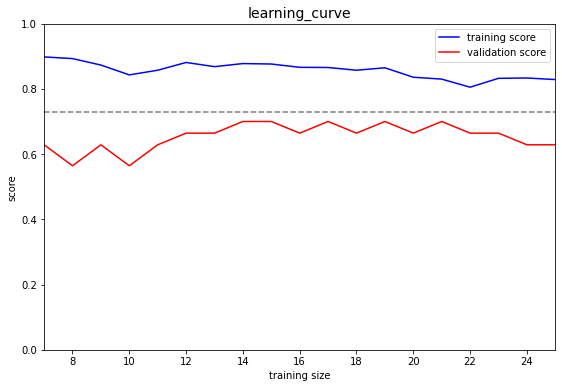

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(GaussianNB(),
                                         X[:30], y[:30], cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

ax.set_ylim(0, 1)
ax.set_xlim(N[0], N[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.set_title('learning_curve', size=14)
ax.legend(loc='best')

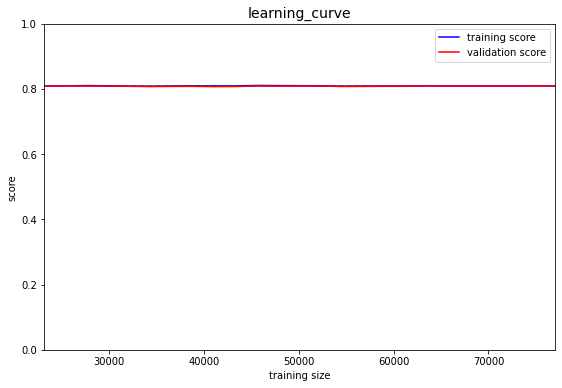

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(GaussianNB(),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

ax.set_ylim(0, 1)
ax.set_xlim(N[0], N[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.set_title('learning_curve', size=14)
ax.legend(loc='best')

كمية البيانات كافية وهنالك فائض أي يمكن الاكتفاء بكمية أقل بكثير

gamma = 0.01  accuracy = 0.8865   AUC = 0.9438
gamma = 0.10  accuracy = 0.9347   AUC = 0.9809
gamma = 0.50  accuracy = 0.9508   AUC = 0.9874
gamma = 1.00  accuracy = 0.9508   AUC = 0.9874
gamma = 10.00  accuracy = 0.8307   AUC = 0.9654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


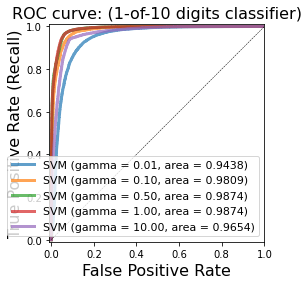

In [ ]:
from sklearn.metrics import roc_curve, auc

scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.5, 1, 10]:
    svm = SVC(gamma=g).fit(X_train_scaler, y_train)
    y_score_svm = svm.decision_function(X_test_scaler)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test_scaler, y_test)
    print("gamma = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

min_samples_leaf = 4.00  accuracy = 0.9443   AUC = 0.9443
min_samples_leaf = 10.00  accuracy = 0.9471   AUC = 0.9470
min_samples_leaf = 20.00  accuracy = 0.9473   AUC = 0.9473
min_samples_leaf = 50.00  accuracy = 0.9432   AUC = 0.9432
min_samples_leaf = 500.00  accuracy = 0.9214   AUC = 0.9214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


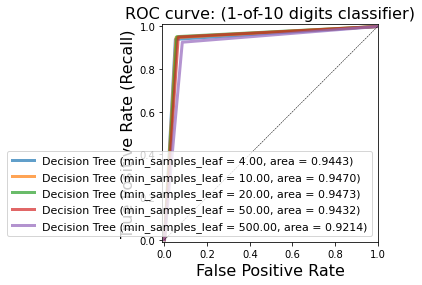

In [ ]:
from sklearn.metrics import roc_curve, auc


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for min_samples_leaf in [4, 10, 20, 50, 500]:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42).fit(X_train, y_train)
    y_score = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = model.score(X_test, y_test)
    print("min_samples_leaf = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(min_samples_leaf, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Decision Tree (min_samples_leaf = {:0.2f}, area = {:0.4f})'.format(min_samples_leaf, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

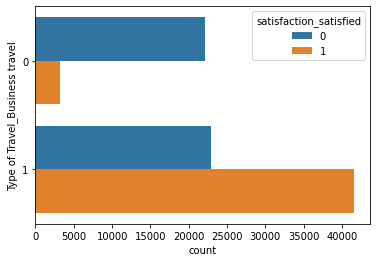

In [ ]:
import seaborn as sns
dtf = data_dummies
sns.countplot(y='Type of Travel_Business travel', hue='satisfaction_satisfied', data=dtf,)

يوجد علاقة قوية بين سبب السفر ورضا الزبون فالزبائن الذين سافروا للعمل كانوا أكثر رضا من الزبائن الذين سافروا لأسباب شخصية


count    89897.000000
mean      1228.012659
std       1018.544428
min         31.000000
25%        421.000000
50%        862.000000
75%       1819.000000
max       4983.000000
Name: Flight Distance, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


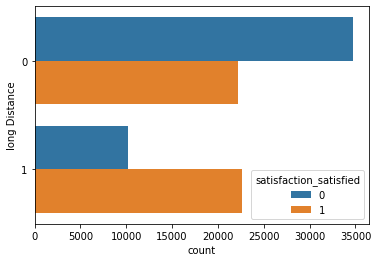

In [ ]:
print(dtf['Flight Distance'].describe())
dtf['long Distance'] = 0
dtf['long Distance'] [dtf['Flight Distance'] > 1229.503921] = 1
sns.countplot(y='long Distance', hue='satisfaction_satisfied', data=dtf,)

أغلب الزبائن الذين سافروا مع الشركة لمسافات طويلة يشعرون بالرضا


count    89897.000000
mean      1228.012659
std       1018.544428
min         31.000000
25%        421.000000
50%        862.000000
75%       1819.000000
max       4983.000000
Name: Flight Distance, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


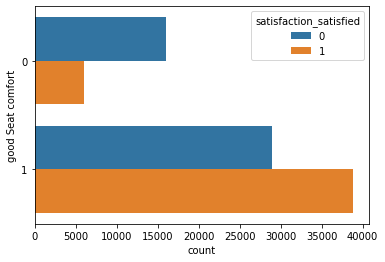

In [ ]:
print(dtf['Flight Distance'].describe())
dtf['good Seat comfort'] = 0
dtf['good Seat comfort'] [dtf['Seat comfort'] > 2.5] = 1
sns.countplot(y='good Seat comfort', hue='satisfaction_satisfied', data=dtf,)

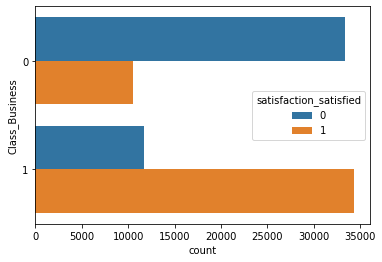

In [ ]:
sns.countplot(y='Class_Business', hue='satisfaction_satisfied', data=dtf,)

معظم الأشخاص الغير راضين كانوا في درجات غير درجة الأعمال 

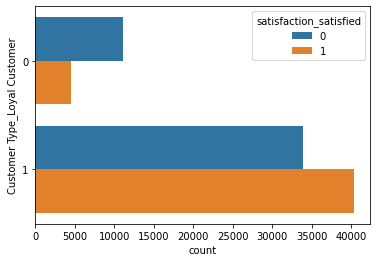

In [ ]:
sns.countplot(y='Customer Type_Loyal Customer', hue='satisfaction_satisfied', data=dtf,)

يوجد علاقة بين الزبون المخلص ورضا الزبون 

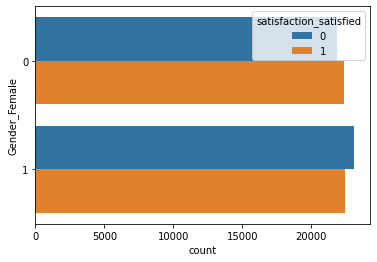

In [ ]:
sns.countplot(y='Gender_Female', hue='satisfaction_satisfied', data=dtf,)

لا علاقة بين جنس الراكب ورضاه

**Features Correlations**

In [ ]:
from sklearn.feature_selection import SelectPercentile

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X, y)
# transform training set
X_train_selected = select.transform(X)

print("X_train.shape: {}".format(X.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (89897, 27)
X_train_selected.shape: (89897, 13)


In [ ]:
mask = select.get_support()
keep_features = data_dummies
#keep_features = keep_features.drop('satisfaction_neutral or dissatisfied',axis=1)
#keep_features = keep_features.drop('satisfaction_satisfied',axis=1)
for i in range(len(mask)):  
  if mask[i]:
    print(data_dummies.columns[i]) 
print("\nremoved\n")
for i in range(len(mask)):  
  if not mask[i]:
    print(data_dummies.columns[i])
    keep_features = keep_features.drop(data_dummies.columns[i],axis=1)


Flight Distance
Inflight wifi service
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Cleanliness
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business
Class_Eco

removed

Age
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Checkin service
Inflight service
Departure Delay in Minutes
Arrival Delay in Minutes
Gender_Female
Gender_Male
Customer Type_Loyal Customer
Customer Type_disloyal Customer
Class_Eco Plus


In [ ]:
features_after_selction = keep_features.loc[:,'Flight Distance':'Class_Eco']
target_after_selction = keep_features.loc[:,'satisfaction_neutral or dissatisfied']
# extract NumPy arrays
X_after_selction = features_after_selction.values
y_after_selction = target_after_selction.values
print("X.shape: {}  y.shape: {}".format(X_after_selction.shape, y_after_selction.shape))

X_train_after_selction, X_test_after_selction, y_train_after_selction, y_test_after_selction = train_test_split(X_after_selction, y_after_selction, random_state=0)



X.shape: (89897, 13)  y.shape: (89897,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


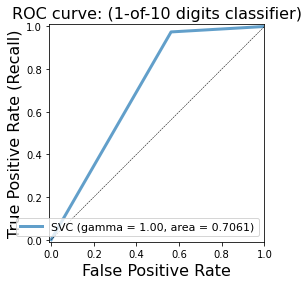

----------------------------
gamma = 1.00  accuracy = 0.7055   AUC = 0.7061
----------------------------
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.44      0.60     11262
              satisfied       0.63      0.97      0.77     11213

               accuracy                           0.71     22475
              macro avg       0.79      0.71      0.68     22475
           weighted avg       0.79      0.71      0.68     22475



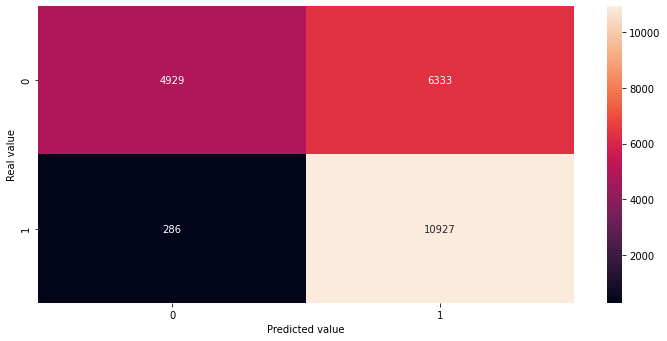

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
gamma = 1
model = SVC(gamma=gamma).fit(X_train_after_selction, y_train_after_selction)
y_score = model.predict(X_test_after_selction)
fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
roc_auc = auc(fpr, tpr)
accuracy = model.score(X_test_after_selction, y_test_after_selction)

plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='SVC (gamma = {:0.2f}, area = {:0.4f})'.format(gamma, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()
print("----------------------------")

print("gamma = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(gamma, accuracy, 
                                                                    roc_auc))
print("----------------------------")
target_names = target_after_selction.unique()
features_names = keep_features.columns
print(classification_report(y_test_after_selction, y_score, target_names=['neutral or dissatisfied','satisfied']))

con_matrix = confusion_matrix(y_test_after_selction, y_score)
# ploting confustion matrix
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


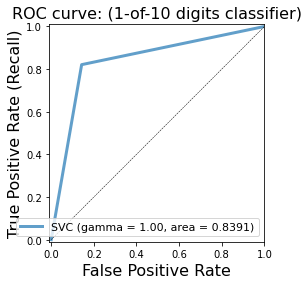

----------------------------
gamma = 1.00  accuracy = 0.8392   AUC = 0.8391
----------------------------
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.86      0.84     11262
              satisfied       0.85      0.82      0.84     11213

               accuracy                           0.84     22475
              macro avg       0.84      0.84      0.84     22475
           weighted avg       0.84      0.84      0.84     22475



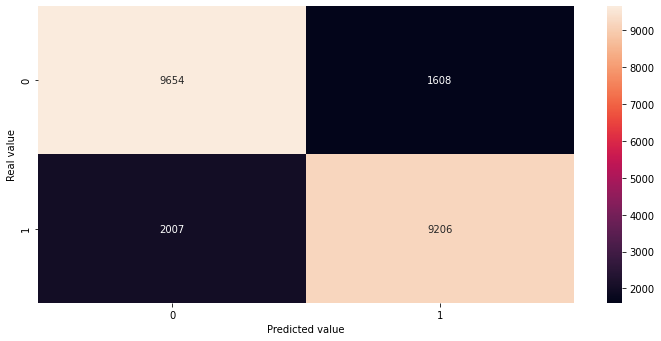

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
gamma = 1
model = GaussianNB().fit(X_train_after_selction, y_train_after_selction)
y_score = model.predict(X_test_after_selction)
fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
roc_auc = auc(fpr, tpr)
accuracy = model.score(X_test_after_selction, y_test_after_selction)

plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='SVC (gamma = {:0.2f}, area = {:0.4f})'.format(gamma, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()
print("----------------------------")

print("gamma = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(gamma, accuracy, 
                                                                    roc_auc))
print("----------------------------")
target_names = target_after_selction.unique()
features_names = keep_features.columns
print(classification_report(y_test_after_selction, y_score, target_names=['neutral or dissatisfied','satisfied']))

con_matrix = confusion_matrix(y_test_after_selction, y_score)
# ploting confustion matrix
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

min_samples_leaf = 4.00  accuracy = 0.9384   AUC = 0.9384
min_samples_leaf = 10.00  accuracy = 0.9396   AUC = 0.9395
min_samples_leaf = 20.00  accuracy = 0.9417   AUC = 0.9416
min_samples_leaf = 50.00  accuracy = 0.9401   AUC = 0.9399
min_samples_leaf = 500.00  accuracy = 0.9232   AUC = 0.9231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


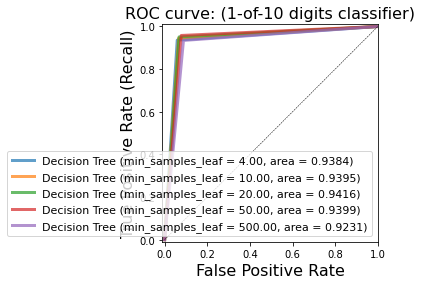

In [ ]:
from sklearn.metrics import roc_curve, auc


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for min_samples_leaf in [4, 10, 20, 50, 500]:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42).fit(X_train_after_selction, y_train_after_selction)
    y_score = model.predict(X_test_after_selction)
    fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = model.score(X_test_after_selction, y_test_after_selction)
    print("min_samples_leaf = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(min_samples_leaf, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Decision Tree (min_samples_leaf = {:0.2f}, area = {:0.4f})'.format(min_samples_leaf, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X, y)
X_train_l1 = select.transform(X)
print("X_train.shape: {}".format(X.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (89897, 27)
X_train_l1.shape: (89897, 14)


In [ ]:
mask = select.get_support()
keep_features = data_dummies
for i in range(len(mask)):  
  if mask[i]:
    print(data_dummies.columns[i]) 
print("\nremoved\n")
for i in range(len(mask)):  
  if not mask[i]:
    print(data_dummies.columns[i])
    keep_features = keep_features.drop(data_dummies.columns[i],axis=1)

Age
Flight Distance
Inflight wifi service
Ease of Online booking
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Customer Type_Loyal Customer
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business
Class_Eco

removed

Departure/Arrival time convenient
Gate location
Food and drink
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
Gender_Female
Gender_Male
Customer Type_disloyal Customer
Class_Eco Plus


In [ ]:
features_after_selction = keep_features.loc[:,'Age':'Class_Eco']
target_after_selction = keep_features.loc[:,'satisfaction_neutral or dissatisfied']
# extract NumPy arrays
X_after_selction = features_after_selction.values
y_after_selction = target_after_selction.values
print("X.shape: {}  y.shape: {}".format(X_after_selction.shape, y_after_selction.shape))

X_train_after_selction, X_test_after_selction, y_train_after_selction, y_test_after_selction = train_test_split(X_after_selction, y_after_selction, random_state=0)

X.shape: (89897, 14)  y.shape: (89897,)


min_samples_leaf = 4.00  accuracy = 0.9293   AUC = 0.9294
min_samples_leaf = 10.00  accuracy = 0.9349   AUC = 0.9349
min_samples_leaf = 20.00  accuracy = 0.9388   AUC = 0.9388
min_samples_leaf = 50.00  accuracy = 0.9398   AUC = 0.9397
min_samples_leaf = 500.00  accuracy = 0.9212   AUC = 0.9211


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


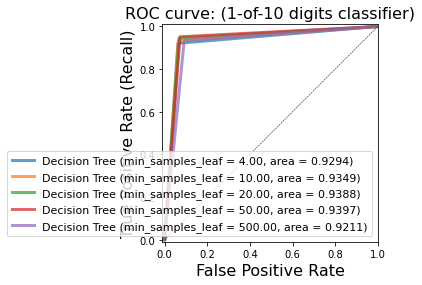

In [ ]:
from sklearn.metrics import roc_curve, auc


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for min_samples_leaf in [4, 10, 20, 50, 500]:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42).fit(X_train_after_selction, y_train_after_selction)
    y_score = model.predict(X_test_after_selction)
    fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = model.score(X_test_after_selction, y_test_after_selction)
    print("min_samples_leaf = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(min_samples_leaf, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Decision Tree (min_samples_leaf = {:0.2f}, area = {:0.4f})'.format(min_samples_leaf, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

In [ ]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=10)

select.fit(X, y)
# visualize the selected features:
mask = select.get_support()


In [ ]:
mask = select.get_support()
keep_features = data_dummies
for i in range(len(mask)):  
  if mask[i]:
    print(data_dummies.columns[i]) 
print("\nremoved\n")
for i in range(len(mask)):  
  if not mask[i]:
    print(data_dummies.columns[i])
    keep_features = keep_features.drop(data_dummies.columns[i],axis=1)

Age
Flight Distance
Inflight wifi service
Ease of Online booking
Online boarding
Seat comfort
Inflight entertainment
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business

removed

Departure/Arrival time convenient
Gate location
Food and drink
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
Gender_Female
Gender_Male
Customer Type_Loyal Customer
Customer Type_disloyal Customer
Class_Eco
Class_Eco Plus


In [ ]:
features_after_selction = keep_features.loc[:,'Age':'Class_Business']
target_after_selction = keep_features.loc[:,'satisfaction_neutral or dissatisfied']
# extract NumPy arrays
X_after_selction = features_after_selction.values
y_after_selction = target_after_selction.values
print("X.shape: {}  y.shape: {}".format(X_after_selction.shape, y_after_selction.shape))

X_train_after_selction, X_test_after_selction, y_train_after_selction, y_test_after_selction = train_test_split(X_after_selction, y_after_selction, random_state=0)

X.shape: (89897, 10)  y.shape: (89897,)


min_samples_leaf = 4.00  accuracy = 0.9188   AUC = 0.9189
min_samples_leaf = 10.00  accuracy = 0.9248   AUC = 0.9249
min_samples_leaf = 20.00  accuracy = 0.9283   AUC = 0.9283
min_samples_leaf = 50.00  accuracy = 0.9302   AUC = 0.9302
min_samples_leaf = 500.00  accuracy = 0.9151   AUC = 0.9151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


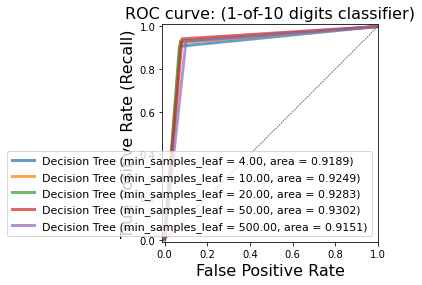

In [ ]:
from sklearn.metrics import roc_curve, auc


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for min_samples_leaf in [4, 10, 20, 50, 500]:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42).fit(X_train_after_selction, y_train_after_selction)
    y_score = model.predict(X_test_after_selction)
    fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = model.score(X_test_after_selction, y_test_after_selction)
    print("min_samples_leaf = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(min_samples_leaf, accuracy, 
                                                                    roc_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Decision Tree (min_samples_leaf = {:0.2f}, area = {:0.4f})'.format(min_samples_leaf, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

model Evalutaion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


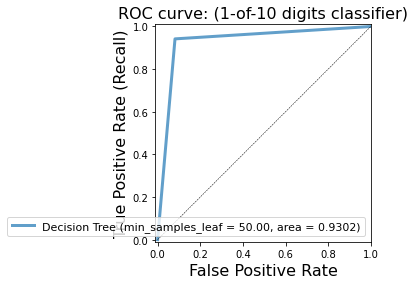

----------------------------
min_samples_leaf = 50.00  accuracy = 0.9302   AUC = 0.9302
----------------------------
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.92      0.93     11200
              satisfied       0.92      0.94      0.93     11275

               accuracy                           0.93     22475
              macro avg       0.93      0.93      0.93     22475
           weighted avg       0.93      0.93      0.93     22475



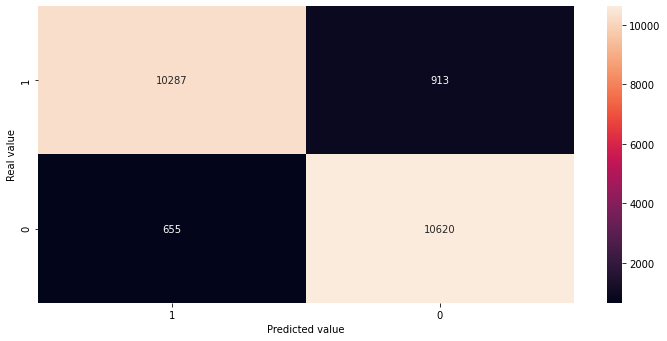

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
min_samples_leaf = 50
model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42).fit(X_train_after_selction, y_train_after_selction)
y_score = model.predict(X_test_after_selction)
fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
roc_auc = auc(fpr, tpr)
accuracy = model.score(X_test_after_selction, y_test_after_selction)

plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Decision Tree (min_samples_leaf = {:0.2f}, area = {:0.4f})'.format(min_samples_leaf, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()
print("----------------------------")

print("min_samples_leaf = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(min_samples_leaf, accuracy, 
                                                                    roc_auc))
print("----------------------------")
target_names = target_after_selction.unique()
features_names = keep_features.columns
print(classification_report(y_test_after_selction, y_score, target_names=['neutral or dissatisfied','satisfied']))

con_matrix = confusion_matrix(y_test_after_selction, y_score)
# ploting confustion matrix
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


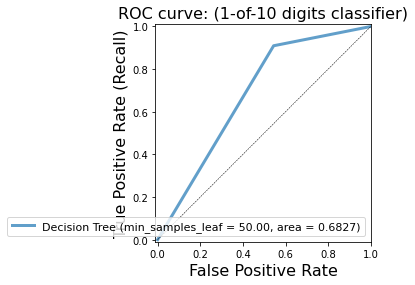

----------------------------
gamma = 1.00  accuracy = 0.6835   AUC = 0.6827
----------------------------
                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.46      0.59     11200
              satisfied       0.63      0.91      0.74     11275

               accuracy                           0.68     22475
              macro avg       0.73      0.68      0.67     22475
           weighted avg       0.73      0.68      0.67     22475



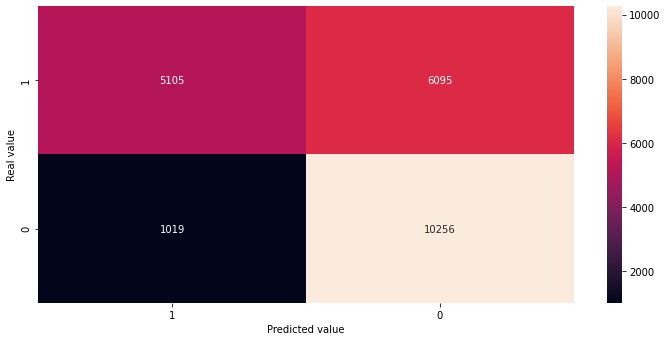

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
gamma = 1
model = SVC(gamma=gamma).fit(X_train_after_selction, y_train_after_selction)
y_score = model.predict(X_test_after_selction)
fpr, tpr, _ = roc_curve(y_test_after_selction, y_score)
roc_auc = auc(fpr, tpr)
accuracy = model.score(X_test_after_selction, y_test_after_selction)

plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='SVC (gamma = {:0.2f}, area = {:0.4f})'.format(gamma, roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()
print("----------------------------")

print("gamma = {:.2f}  accuracy = {:.4f}   AUC = {:.4f}".format(gamma, accuracy, 
                                                                    roc_auc))
print("----------------------------")
target_names = target_after_selction.unique()
features_names = keep_features.columns
print(classification_report(y_test_after_selction, y_score, target_names=['neutral or dissatisfied','satisfied']))

con_matrix = confusion_matrix(y_test_after_selction, y_score)
# ploting confustion matrix
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()


In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
def calc_correlations(fn, exclude = [], th=.5):
  th = 0.5
  for i in range(len(features.columns)):
    col1 = features.columns[i]
    
    if col1 in exclude: continue

    print(f'=================== {col1} correlations ===================')

    for j in range(i+1, len(features.columns)):
      col2 = features.columns[j]

      if col1 in exclude or col1 == col2: continue

      x = features[col1]
      y = features[col2]
      
      corr, _ = fn(x, y)
      if corr < th and corr > -th: continue

      print(f'{fn.__name__} correlation between {col1} and {col2}: {corr:.3f}')

In [ ]:
# Pearson's correlation coefficient = covariance(x, y) / (stdv(x) * stdv(y))
calc_correlations(pearsonr, ['Unnamed: 0', 'id'])

=================== Age correlations ===================
=================== Flight Distance correlations ===================
=================== Inflight wifi service correlations ===================
pearsonr correlation between Inflight wifi service and Ease of Online booking: 0.729
=================== Departure/Arrival time convenient correlations ===================
=================== Ease of Online booking correlations ===================
=================== Gate location correlations ===================
=================== Food and drink correlations ===================
pearsonr correlation between Food and drink and Seat comfort: 0.562
pearsonr correlation between Food and drink and Inflight entertainment: 0.603
pearsonr correlation between Food and drink and Cleanliness: 0.641
=================== Online boarding correlations ===================
=================== Seat comfort correlations ===================
pearsonr correlation between Seat comfort and Inflight entertainment

In [ ]:
# Spearman's correlation coefficient = covariance(rank(x), rank(y)) / (stdv(rank(x)) * stdv(rank(y)))
calc_correlations(spearmanr, ['Unnamed: 0', 'id'])

=================== Age correlations ===================
=================== Flight Distance correlations ===================
=================== Inflight wifi service correlations ===================
spearmanr correlation between Inflight wifi service and Ease of Online booking: 0.723
=================== Departure/Arrival time convenient correlations ===================
=================== Ease of Online booking correlations ===================
=================== Gate location correlations ===================
=================== Food and drink correlations ===================
spearmanr correlation between Food and drink and Seat comfort: 0.540
spearmanr correlation between Food and drink and Inflight entertainment: 0.586
spearmanr correlation between Food and drink and Cleanliness: 0.626
=================== Online boarding correlations ===================
=================== Seat comfort correlations ===================
spearmanr correlation between Seat comfort and Inflight entertai

In [ ]:
gender_f = features['Gender_Female'].values
gender_m = features['Gender_Male'].values

corr, _ = pearsonr(gender_f, gender_m)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -1.000


**Feature Selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [c for c in features.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(features.values, target.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.044 seconds


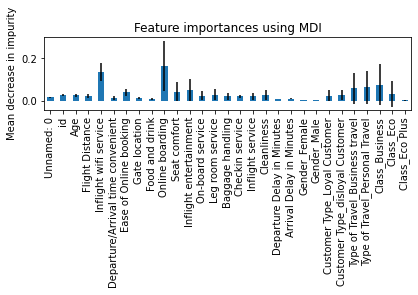

In [ ]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, features.values, target.values, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 311.499 seconds


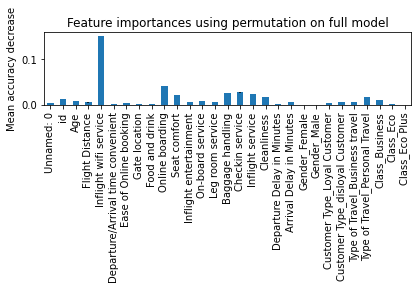

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Optimal number of features : 15


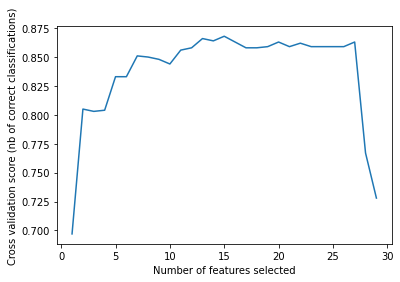

In [ ]:
# run for hour and not finish on all data
# I will try on 1000 sample
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

nn = 1000
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(features.values[:nn], target.values[:nn])

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()